# Fraud Detection — Analytics & Monitoring Insights

## Questions
1. What is the overall fraud rate?
2. How does fraud vary by transaction amount?
3. What patterns can help risk teams prioritize investigation?
4. What fields/behaviors separate fraud vs normal?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

DATA_PATH = Path("../data/processed/fraud_transactions_clean.csv")
df = pd.read_csv(DATA_PATH)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
fraud_rate = df["Class"].mean() * 100
total_txn = len(df)
fraud_txn = df["Class"].sum()

fraud_rate, total_txn, fraud_txn

(np.float64(0.1667101358352777), 283726, np.int64(473))

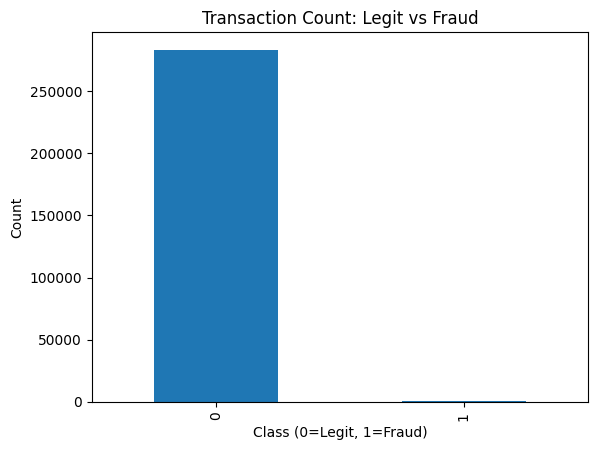

In [4]:
counts = df["Class"].value_counts()

plt.figure()
counts.plot(kind="bar")
plt.title("Transaction Count: Legit vs Fraud")
plt.xlabel("Class (0=Legit, 1=Fraud)")
plt.ylabel("Count")
plt.show()

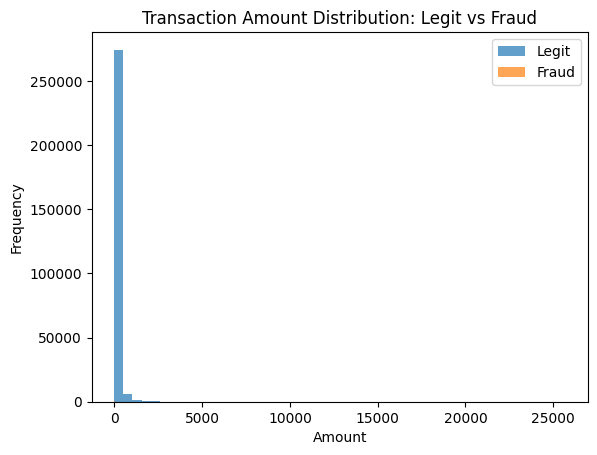

In [5]:
legit = df[df["Class"] == 0]["Amount"]
fraud = df[df["Class"] == 1]["Amount"]

plt.figure()
plt.hist(legit, bins=50, alpha=0.7, label="Legit")
plt.hist(fraud, bins=50, alpha=0.7, label="Fraud")
plt.title("Transaction Amount Distribution: Legit vs Fraud")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [6]:
bins = [0, 10, 50, 100, 200, 500, 1000, df["Amount"].max()]
labels = ["0-10","10-50","50-100","100-200","200-500","500-1000","1000+"]

df["AmountBucket"] = pd.cut(df["Amount"], bins=bins, labels=labels, include_lowest=True)

bucket_kpi = (
    df.groupby("AmountBucket")
      .agg(total_txn=("Class","count"),
           fraud_txn=("Class","sum"),
           fraud_rate=("Class","mean"),
           avg_amount=("Amount","mean"))
      .reset_index()
)

bucket_kpi["fraud_rate"] = bucket_kpi["fraud_rate"] * 100
bucket_kpi.sort_values("fraud_rate", ascending=False)

,AmountBucket,total_txn,fraud_txn,fraud_rate,avg_amount
5,500-1000,6174,25,0.404924,693.405269
6,1000+,2935,9,0.306644,1808.396276
4,200-500,19661,48,0.244138,310.141996
0,0-10,99821,238,0.238427,3.888416
3,100-200,27629,43,0.155634,143.190176
2,50-100,37179,55,0.147933,73.307195
1,10-50,90327,55,0.060890,25.969395


In [7]:
OUT_KPI = Path("../data/processed/fraud_amount_bucket_kpis.csv")
bucket_kpi.to_csv(OUT_KPI, index=False)
print(f"Saved: {OUT_KPI.resolve()}")

Saved: C:\data_projects\banking-fraud-detection-analytics\data\processed\fraud_amount_bucket_kpis.csv
